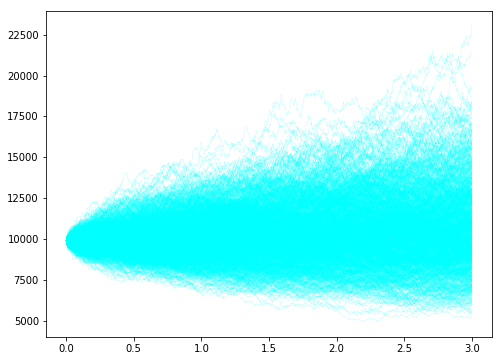

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,6)

times=np.linspace(0,3,1096)
dt=np.diff(times)
mu=0.02
sigma=0.1357
mcnum=100000
S0=9900
X=np.zeros((mcnum,len(times)))
X[:,0]=np.log(S0)
for i,h in enumerate(dt):
    z=np.random.normal(size=mcnum)
    dw=z*np.sqrt(h)
    X[:,i+1]=X[:,i]+(mu-0.5*sigma**2)*h+sigma*dw
    
S=np.exp(X)
for i in range(1095):
    plt.plot(times,S[i,:],':',lw=0.3,c='cyan')
    



In [3]:
S

array([[ 9900.        ,  9955.93552122,  9922.49795418, ...,
        12320.99487652, 12284.96156693, 12338.91704937],
       [ 9900.        ,  9756.37528544,  9772.08764614, ...,
        10279.42440142, 10353.08302386, 10338.27094209],
       [ 9900.        ,  9950.41801888, 10123.67903641, ...,
        11079.12670437, 11119.12838249, 11078.76862796],
       ...,
       [ 9900.        ,  9935.24557584,  9949.40637435, ...,
         9993.96332308, 10014.9371151 ,  9898.17033019],
       [ 9900.        ,  9878.03015294, 10005.43084804, ...,
        15692.14007199, 15826.73581265, 15955.36303232],
       [ 9900.        ,  9845.15823294,  9833.40159718, ...,
         8193.34842524,  8171.21602704,  8226.79444639]])

V, ptime=  9700.861812754792 0.612034797668457
Q =  0.5546297899368483


C:\Users\van\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


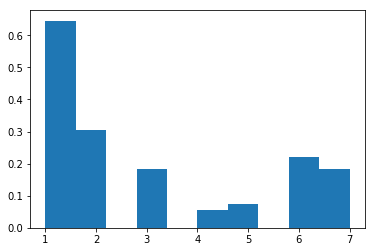

In [4]:
import time
import numpy as np
#np.random.seed(1373)

qrates = [0.0228, 0.0186, 0.0331] #배당율
zrates = [0.01315, 0.01535, 0.000] 

sigma1 = 0.1357
sigma2 = 0.1297
sigma3 = 0.1348
cor12 = cor21 = 0.0982
cor13 = cor31 = 0.2660
cor23 = cor32 = 0.7120
corrmat = [[1,cor12,cor13],
           [cor21,1,cor23],
           [cor31,cor32,1]]

zrates[1] = zrates[1] - cor12*sigma1*sigma2  #콴토조정
zrates[2] = zrates[2] - cor13*sigma1*sigma3

ki = 0.65 #knock in barrier
R = 0.0401 #ko coupon rate(6개월)
times = np.array([0.5, 1, 1.5, 2, 2.5, 3])
er = np.array([0.95,0.9,0.85,0.85,0.8,0.65]) #evaluation rate
pf = np.array([1,2,3,4,5,6])*R/2+1 #auto call payoff
df = np.exp(-zrates[0]*times)

#times2 = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
times2 = np.append(0,times)
dt = np.diff(times2)
mcnum = 100000

X  = np.zeros((mcnum,len(times2)))
X1 = np.zeros((mcnum,len(times2)))
X2 = np.zeros((mcnum,len(times2)))
X3 = np.zeros((mcnum,len(times2)))

start = time.time()
for i,h in enumerate(dt):
    #z = np.random.normal(size=mcnum)
    zzz = np.random.multivariate_normal([0,0,0], corrmat, mcnum)
    dw = zzz*np.sqrt(h)
    X1[:,i+1] = X1[:,i] + (zrates[0]-qrates[0]-0.5*sigma1**2)*h + sigma1*dw[:,0]  
    X2[:,i+1] = X2[:,i] + (zrates[1]-qrates[1]-0.5*sigma2**2)*h + sigma2*dw[:,1]  
    X3[:,i+1] = X3[:,i] + (zrates[2]-qrates[2]-0.5*sigma3**2)*h + sigma3*dw[:,2]      
    X[:,i+1] = np.minimum(np.minimum(X1[:,i+1],X2[:,i+1]),X3[:,i+1])

        
S = np.exp(X[:,1:])
P = np.zeros(mcnum)
Q = 0
QC = 0
autocall = np.zeros(mcnum)
for i,ss in enumerate(S):
    flag=0
    for j,s in enumerate(ss):
        if s>=er[j]: #각 시점별 조기상환조건 넘으면
            flag=1
            P[i] = pf[j]*df[j]  #조기상환지급금액*할인율
            autocall[i] = j+1  
            break
    if flag==0:
        if ki==np.nan:
            P[i] = s*df[-1]
        else:
            if len(ss[ss<=ki])>0:  #0.65보다 낮은 갯수가 하나라도 있으면
                P[i] = s*df[-1]  #s*할인율
                autocall[i] = j+2
                Q += P[i]
                QC +=1
            else:
                P[i] = pf[-1]*df[-1]  #지급금액은 X(T6)*할인율
                autocall[i] = j+1
            
V = np.mean(P)
endt = time.time()
print('V, ptime= ', V*9900, endt-start)
print('Q = ',Q/QC)
plt.hist(autocall, normed=True)
plt.show()

In [5]:
pd.Series(autocall).value_counts()

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
pd.DataFrame(S,autocall)

In [ ]:
er

In [ ]:
import pandas as pd
pd.DataFrame(Payoff)
